In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.utils import shuffle
from sklearn import metrics


In [18]:
# loading the dataset
train1 = pd.read_csv("topfeatures.csv")
train1.shape

(595212, 12)

In [19]:
# splitting dataset so that equal class variables are present
train1class1 = train1.loc[train1['target'] == 1]
train1class0 = train1.loc[train1['target'] == 0]

print(train1class1.shape)
print(train1class0.shape)

train1class1head500 = train1class1.head(5000)
train1class0head500 = train1class0.head(5000)

frames = [train1class1head500, train1class0head500]
train2 = pd.concat(frames)

train2.shape

(21694, 12)
(573518, 12)


(10000, 12)

In [21]:
train2.head()

,id,target,ps_car_11,ps_reg_01,ps_car_12,ps_car_09_cat,ps_ind_13_bin,ps_ind_01,ps_calc_08,ps_calc_12,ps_car_15,ps_calc_09
9,609480,1,3,0.9,0.447214,2,0,5,8,2,3.464102,4
42,1295557,1,2,0.7,0.447214,0,0,0,9,3,3.000000,4
74,165047,1,1,0.8,0.374166,2,0,0,9,2,3.464102,5
104,896238,1,3,0.4,0.400000,2,0,4,9,1,3.162278,3
108,712768,1,2,0.1,0.447214,0,0,7,8,1,3.741657,2


In [22]:
# seperating target variable
X = train2[train2.columns[2:]]
y = train2[train2.columns[1:2]]

In [23]:
# Stratified sampling into Test and Train datasets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123, stratify = y)

In [24]:
## SVM with Linear kernel

#Create a svm Classifier
linclf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
linclf.fit(X_train, y_train)

#Predict the response for test dataset
y_linpred = linclf.predict(X_test)

# confusion matrix 
lincnf_matrix = metrics.confusion_matrix(y_test, y_linpred)
lincnf_matrix

array([[639, 611],
       [481, 769]])

Text(0.5,257.44,'Predicted label')

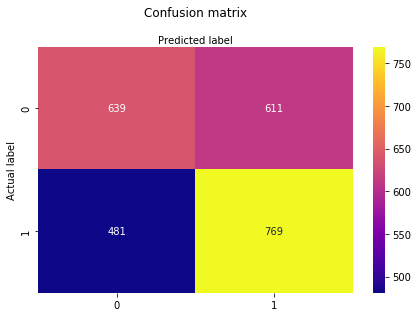

In [28]:
# confusion matrix plot

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(lincnf_matrix), annot=True, cmap="plasma" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [44]:
# SVM with linear kernel Performance
print("SVM with linear kernel Accuracy:",metrics.accuracy_score(y_test, y_linpred))
print("SVM with linear kernel Precision:",metrics.precision_score(y_test, y_linpred))
print("SVM with linear kernel Recall:",metrics.recall_score(y_test, y_linpred))
print("AUC with linear kernel Recall:",metrics.roc_auc_score(y_test, y_linpred))


SVM with linear kernel Accuracy: 0.5632
SVM with linear kernel Precision: 0.5572463768115942
SVM with linear kernel Recall: 0.6152
AUC with linear kernel Recall: 0.5632


In [55]:
# Checking for Over fitting and under fitting
linclf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
linclf.fit(X_train, y_train)

#Predict the response for test dataset
y_linpred = linclf.predict(X_train)

In [56]:
print("SVM with linear kernel Accuracy:",metrics.accuracy_score(y_train, y_linpred))
print("SVM with linear kernel Precision:",metrics.precision_score(y_train, y_linpred))
print("SVM with linear kernel Recall:",metrics.recall_score(y_train, y_linpred))
print("AUC with linear kernel Recall:",metrics.roc_auc_score(y_train, y_linpred))

SVM with linear kernel Accuracy: 0.5621333333333334
SVM with linear kernel Precision: 0.5576732673267327
SVM with linear kernel Recall: 0.6008
AUC with linear kernel Recall: 0.5621333333333334


### SVM with Polynomial Kernel

In [30]:
#Create a svm Classifier with polynomial kernel
polyclf = svm.SVC(kernel='poly') 

#Train the model using the training sets
polyclf.fit(X_train, y_train)

#Predict the response for test dataset
y_polypred = polyclf.predict(X_test)

# confusion matrix
polycnf_matrix = metrics.confusion_matrix(y_test, y_polypred)
polycnf_matrix

array([[643, 607],
       [498, 752]])

Text(0.5,257.44,'Predicted label')

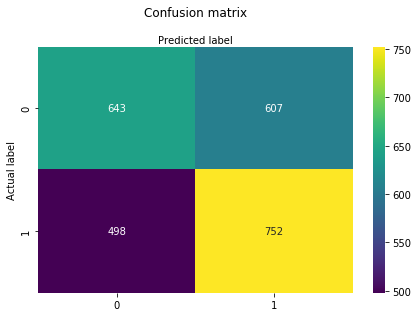

In [31]:
# confusion matrix plot
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(polycnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [46]:
# SVM with polynomial kernel performance
print("SVM with polynomial kernel Accuracy:",metrics.accuracy_score(y_test, y_polypred))
print("SVM with polynomial kernel Precision:",metrics.precision_score(y_test, y_polypred))
print("SVM with polynomial kernel Recall:",metrics.recall_score(y_test, y_polypred))
print("AUC with polynomial kernel Recall:",metrics.roc_auc_score(y_test, y_polypred))


SVM with polynomial kernel Accuracy: 0.558
SVM with polynomial kernel Precision: 0.5533480500367918
SVM with polynomial kernel Recall: 0.6016
AUC with polynomial kernel Recall: 0.5579999999999999


In [53]:
# Checking for Over fitting and under fitting

polyclf = svm.SVC(kernel='poly') 

#Train the model using the training sets
polyclf.fit(X_train, y_train)

#Predict the response for test dataset
y_polypred = polyclf.predict(X_train)

In [54]:
print("SVM with polynomial kernel Accuracy:",metrics.accuracy_score(y_train, y_polypred))
print("SVM with polynomial kernel Precision:",metrics.precision_score(y_train, y_polypred))
print("SVM with polynomial kernel Recall:",metrics.recall_score(y_train, y_polypred))
print("AUC with polynomial kernel Recall:",metrics.roc_auc_score(y_train, y_polypred))

SVM with polynomial kernel Accuracy: 0.5778666666666666
SVM with polynomial kernel Precision: 0.5741869918699187
SVM with polynomial kernel Recall: 0.6026666666666667
AUC with polynomial kernel Recall: 0.5778666666666666


### SVM with RBF kernel

In [52]:
#Create a svm Classifier with RBF Kernel
rbfclf = svm.SVC(kernel='rbf') 

#Train the model using the training sets
rbfclf.fit(X_train, y_train)

#Predict the response for test dataset
y_rbfpred = rbfclf.predict(X_test)

# confusion matrix
rbfcnf_matrix = metrics.confusion_matrix(y_test, y_rbfpred)
rbfcnf_matrix

array([[567, 683],
       [457, 793]])

Text(0.5,257.44,'Predicted label')

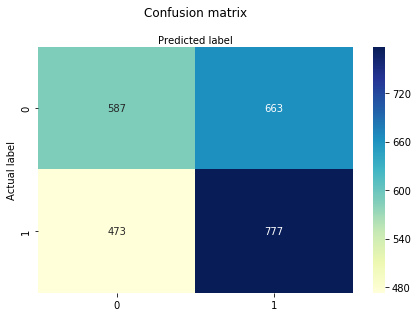

In [34]:
# confusion matrix plot
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(rbfcnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [43]:
# SVM with RBF kernel Performance
print("SVM with RBF kernel Accuracy:",metrics.accuracy_score(y_test, y_rbfpred))
print("SVM with RBF kernel Precision:",metrics.precision_score(y_test, y_rbfpred))
print("SVM with RBF kernel Recall:",metrics.recall_score(y_test, y_rbfpred))
print("AUC with RBF kernel Recall:",metrics.roc_auc_score(y_test, y_rbfpred))



SVM with RBF kernel Accuracy: 0.5456
SVM with RBF kernel Precision: 0.5395833333333333
SVM with RBF kernel Recall: 0.6216
AUC with RBF kernel Recall: 0.5456


In [49]:
# Checking for Over fitting and under fitting

rbfclf = svm.SVC(kernel='rbf') 

#Train the model using the training sets
rbfclf.fit(X_train, y_train)

#Predict the response for test dataset
y_rbfpred = rbfclf.predict(X_train)

In [50]:
print("SVM with RBF kernel Accuracy:",metrics.accuracy_score(y_train, y_rbfpred))
print("SVM with RBF kernel Precision:",metrics.precision_score(y_train, y_rbfpred))
print("SVM with RBF kernel Recall:",metrics.recall_score(y_train, y_rbfpred))
print("AUC with RBF kernel Recall:",metrics.roc_auc_score(y_train, y_rbfpred))


SVM with RBF kernel Accuracy: 0.5993333333333334
SVM with RBF kernel Precision: 0.5907872288569339
SVM with RBF kernel Recall: 0.6464
AUC with RBF kernel Recall: 0.5993333333333333
